In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import  seaborn as sns

file_='iris.csv'
df=pd.read_csv(file_)

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
y1= df.species
df = df.dropna()\
       .rename(columns={'species': 'y'})\
       .drop('y', axis= 1)




In [5]:
df = pd.DataFrame(StandardScaler().fit_transform(df), columns=df.columns)
df.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


In [6]:
km = KMeans(
    n_clusters=3,
    random_state=1,
    init='k-means++' ,
    n_init=10
)
km.get_params()

{'algorithm': 'lloyd',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 3,
 'n_init': 10,
 'random_state': 1,
 'tol': 0.0001,
 'verbose': 0}

C:\Users\Rogelio\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


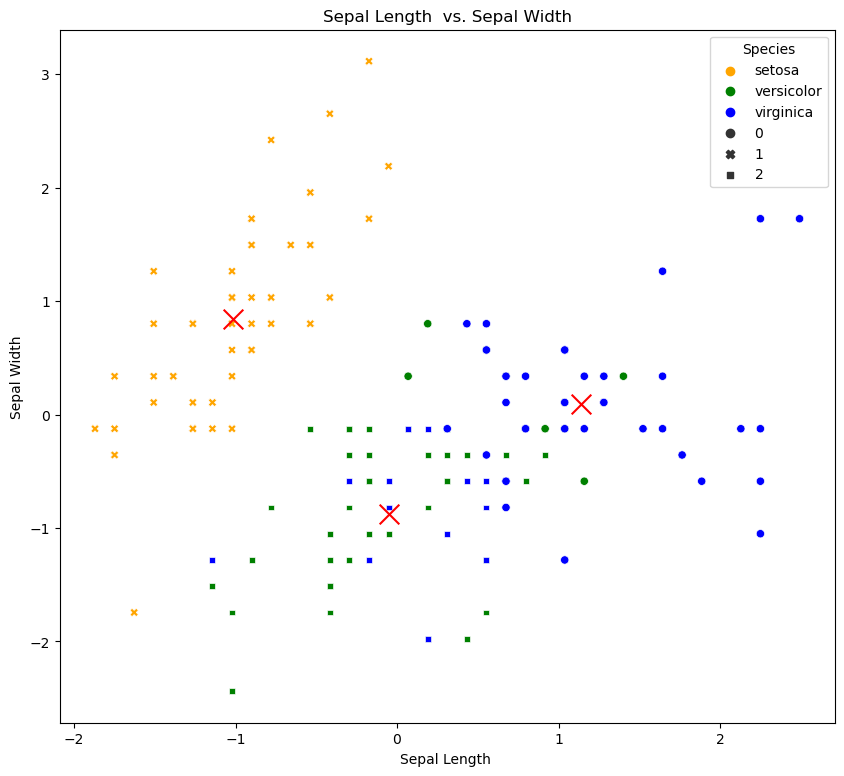

In [7]:
y_clusters = km.fit_predict(df)
plt.figure(figsize=(10, 9))
scatterplot = sns.scatterplot(
    x=df['sepal_length'],
    y=df['sepal_width'],
    data=df,
    hue=y1,
    style=y_clusters,
    palette=["orange" , "green" , "blue"]
)

plt.scatter(
    km.cluster_centers_[:, 0],
    km.cluster_centers_[:, 1],
    marker='x',
    s=200,
    c='red'
)

handles, labels = scatterplot.get_legend_handles_labels()
new_labels=[label if i>=3 else f"Cluster {i + 1}" for i, label in enumerate(labels)]
scatterplot.legend(handles=handles, labels=new_labels) 
scatterplot.legend().set_title( "Species")

plt.title('Sepal Length  vs. Sepal Width')
plt.xlabel('Sepal Length ')
plt.ylabel('Sepal Width')
plt.show()